In [2]:
print("Hola Luristán")
print("Penelopa")
print("holapenes")
print("holaMasPenesParaTodos")
print("HolaJulen")

Hola Luristán
Penelopa
holapenes
holaMasPenesParaTodos
HolaJulen


In [18]:
import pandas as pd

# Define la ruta (path) a tu archivo CSV
# Usamos '../' para "subir" un nivel desde la carpeta 'notebooks/'
path = './data/movies_dataset.csv'

# Carga el CSV en un DataFrame
try:
    df = pd.read_csv(path, sep=',')
    
    # Muestra las primeras 5 filas para verificar que se cargó correctamente
    print("¡Archivo cargado con éxito!")
    print(df.head())
    print("\n=== Data Types ===")
    print(df.dtypes)
    print("\n=== Missing Values per Column ===")
    print(df.isnull().sum())

except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta: {path}")
    print("Asegúrate de que el archivo CSV esté en la carpeta 'data'.")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

¡Archivo cargado con éxito!
   MovieID                         Title        Genre  ReleaseYear  \
0        1          Might toward capital       Comedy         2003   
1        2         He however experience       Comedy         1988   
2        3  Star responsibility politics       Comedy         1971   
3        4                  Exactly live       Comedy         1998   
4        5      Focus improve especially  Documentary         2021   

  ReleaseDate Country    BudgetUSD  US_BoxOfficeUSD  Global_BoxOfficeUSD  \
0  28-09-2003   China 6,577,427.79     6,613,685.82        15,472,035.66   
1  14-02-1988     USA 1,883,810.10     1,930,949.15         3,637,731.12   
2  02-11-1971     USA 2,468,079.29     4,186,694.69         7,165,111.24   
3  06-08-1998     USA 1,447,311.46     2,023,683.92         4,373,820.26   
4  17-12-2021   India   900,915.86     2,129,629.10         3,113,017.38   

   Opening_Day_SalesUSD  One_Week_SalesUSD  IMDbRating  RottenTomatoesScore  \
0          1,77

DATA CLEANING

In [6]:
#Check is there are any missing values

missing_counts = df.isnull().sum()

missing_percentages = (df.isnull().sum() / len(df)) * 100

missing_report = pd.DataFrame({
    'Number of Missing Values': missing_counts,
    'Percentage': missing_percentages
})

print(missing_report.sort_values(by='Percentage', ascending=False))

                      Number of Missing Values  Percentage
MovieID                                      0         0.0
Title                                        0         0.0
Genre                                        0         0.0
ReleaseYear                                  0         0.0
ReleaseDate                                  0         0.0
Country                                      0         0.0
BudgetUSD                                    0         0.0
US_BoxOfficeUSD                              0         0.0
Global_BoxOfficeUSD                          0         0.0
Opening_Day_SalesUSD                         0         0.0
One_Week_SalesUSD                            0         0.0
IMDbRating                                   0         0.0
RottenTomatoesScore                          0         0.0
NumVotesIMDb                                 0         0.0
NumVotesRT                                   0         0.0
Director                                     0         0

In [7]:
#We check if there are any values equal to 0(which could mean that the data is missing) in our numerical variables-->If the code
#doesn't print anything, it means there are no 0 values in those columns.
money_cols = ['BudgetUSD', 'Global_BoxOfficeUSD', 'Opening_Day_SalesUSD', 'US_BoxOfficeUSD','One_Week_SalesUSD','NumVotesRT','NumVotesIMDb','RottenTomatoesScore']
for col in money_cols:
    num_ceros = (df[col] == 0).sum()
    if num_ceros > 0:
        print(f" The column '{col}' has {num_ceros} lines with value 0.")

 The column 'RottenTomatoesScore' has 166 lines with value 0.


In [8]:
#We check if there are any suspicious values in our non-numerical variables-->If the code
#doesn't print anything, it means there are no suspicious values in those columns.
text_cols = ['Genre', 'Director', 'LeadActor', 'Title','Country','ReleaseDate','ReleaseYear']
sus_values = ['Unknown', 'unknown', 'None', '?', 'N/A', 'na']

found_issue = False

for col in text_cols:
    quantity = df[col].isin(sus_values).sum()#isin checks if the values in the column are in the list sus_values
    
    if quantity > 0:
        found_issue = True
        print(f"The column'{col}' has {quantity} values which are '{sus_values}'")

Matplotlib is building the font cache; this may take a moment.


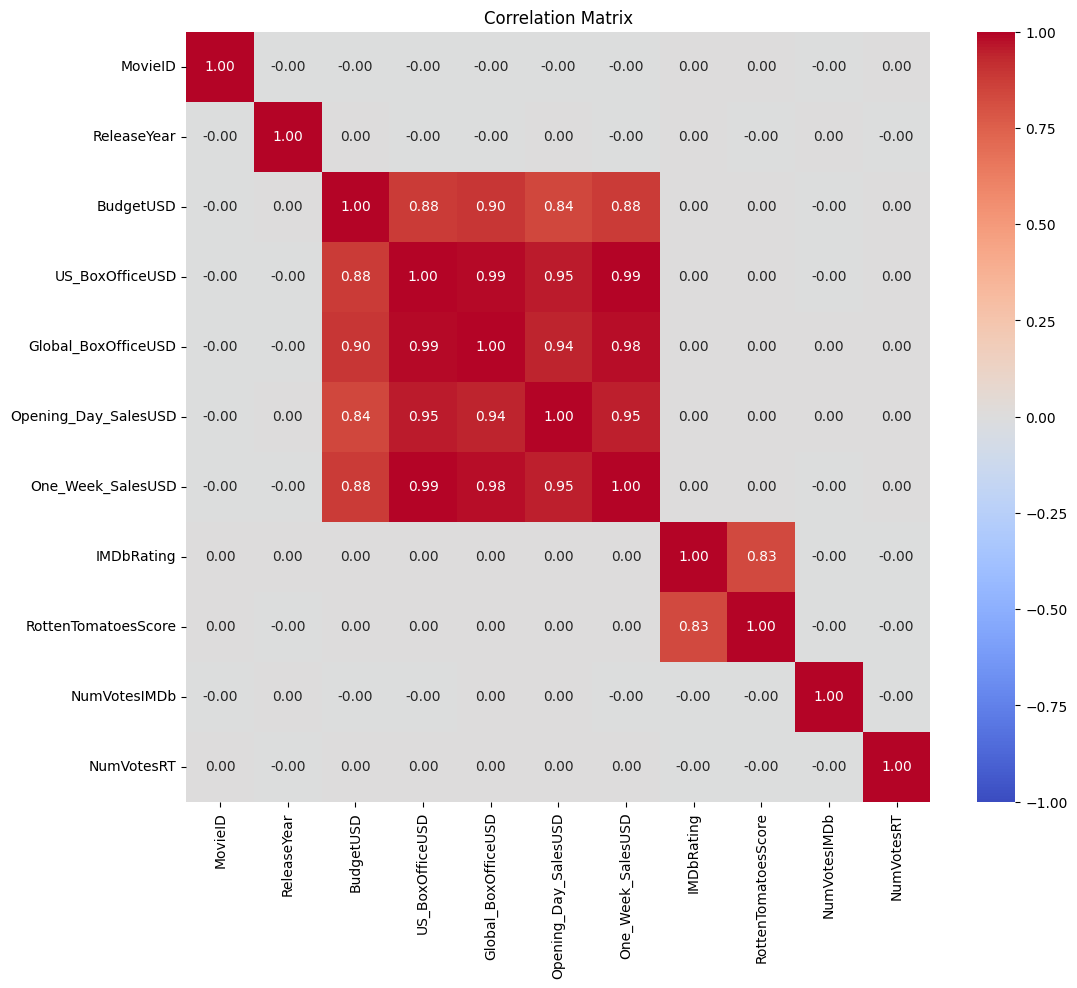

In [10]:
#DATA REDUCTION
#Firstly, we wull check the correlation between numerical variables to see if there are any redundant features. 
#We will say that variables with more than 0.9 correlation are redundant.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#We only analyze numerical columns
cols_exclude = ['target_binary', 'target_multiclass']
X_num = df.select_dtypes(include=['number']).drop(columns=cols_exclude, errors='ignore')

#Calculate the correlation matrix 
corr_matrix = X_num.corr()

#Visualization of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

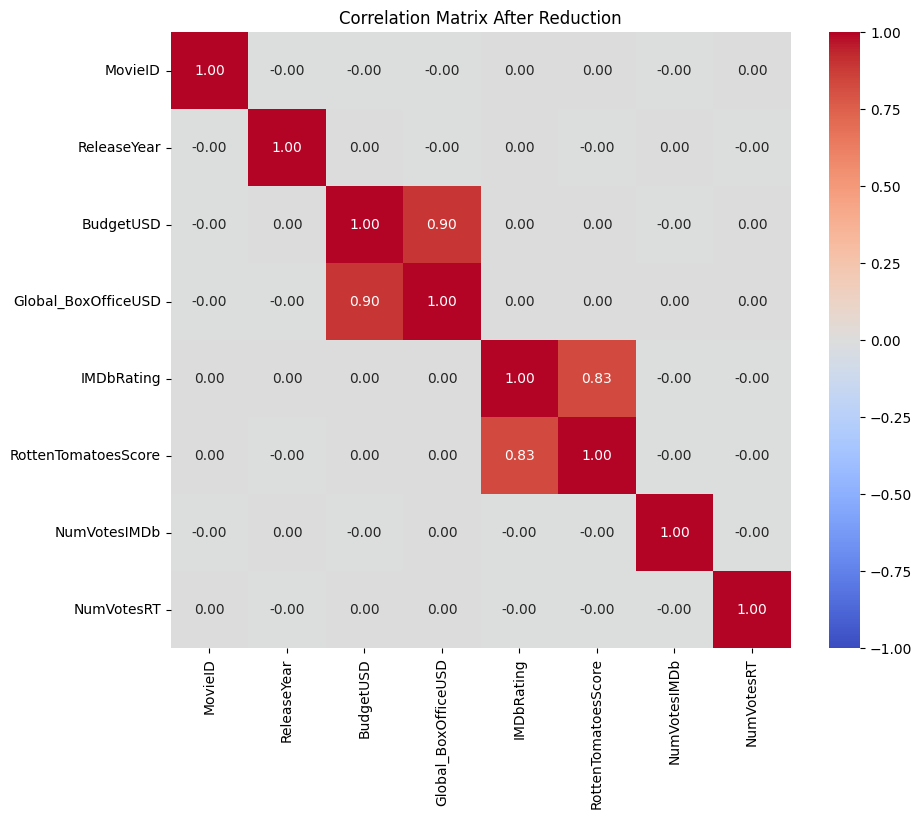

In [11]:
#We apply feature substet selection to remove redundant features
#The matrix with the original data shows high redundancy between features that have to do with money, so we wull remove Opening_Day_SalesUSD, One_Week_SalesUSD and US_BoxOfficeUSD
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#We define the columns to drop based on high correlation with 'Global_BoxOfficeUSD'
to_drop = [
    'US_BoxOfficeUSD',       
    'Opening_Day_SalesUSD',  
    'One_Week_SalesUSD'      
]

to_drop = [c for c in to_drop if c in df.columns]

#We apply the reduction
if len(to_drop) > 0:
    df = df.drop(columns=to_drop)
else:
    print("Columns have already been dropped")


#We visualize our new correlation matrix to confirm that redundancy has been reduced.

cols_excluir_targets = ['target_binary', 'target_multiclass']
X_num_reduced = df.select_dtypes(include=['number']).drop(columns=cols_excluir_targets, errors='ignore')

corr_matrix_final = X_num_reduced.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_final, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix After Reduction')
plt.show()

In [12]:
#HANDLE NOISY DATA
#We create a table where we can see that all the data is coherent.
pd.options.display.float_format = '{:,.2f}'.format

table = df.describe()

personalized_table = table.loc[['min', 'max', 'mean', 'std']].transpose()

print(personalized_table)

                           min              max          mean           std
MovieID                   1.00       999,999.00    500,000.00    288,674.99
ReleaseYear           1,950.00         2,025.00      1,998.00         19.26
BudgetUSD           100,000.00   300,000,000.00  9,802,823.55 22,494,208.37
Global_BoxOfficeUSD 100,000.00 1,499,496,720.00 27,206,253.68 69,542,938.25
IMDbRating                1.00            10.00          6.49          1.49
RottenTomatoesScore       0.00           100.00         64.78         17.59
NumVotesIMDb            100.00     1,000,000.00      9,137.18     24,922.36
NumVotesRT               50.00       500,000.00      2,031.88      8,433.38


In [13]:
#We detect outliers in numerical columns using the IQR method(Variables with more than 10% of outliers should be reviewed)

#Detect numerical columns
cols = df.select_dtypes(include=['number']).columns.tolist()
cols_analyze = [c for c in cols]

outliers = []

for col in cols_analyze:
    #We calculate the Quartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  
    
    # We define the limits for outliers
    limit_inferior = Q1 - 1.5 * IQR
    limit_superior = Q3 + 1.5 * IQR
    
    num_outliers = ((df[col] < limit_inferior) | (df[col] > limit_superior)).sum()

    outliers.append({
        'Variable': col,
        'Inferior Limit': limit_inferior,
        'Superior Limit': limit_superior,
        'Num Outliers': num_outliers,
        '% Outliers': (num_outliers / len(df)) * 100
    })

df_reporte = pd.DataFrame(outliers).set_index('Variable')

pd.options.display.float_format = '{:,.2f}'.format

print(df_reporte.sort_values(by='% Outliers', ascending=False))

                     Inferior Limit  Superior Limit  Num Outliers  % Outliers
Variable                                                                     
NumVotesRT                -1,742.50        3,221.50        124226       12.42
Global_BoxOfficeUSD  -28,422,751.83   54,737,573.02        113298       11.33
BudgetUSD            -10,527,909.46   20,721,211.20        109157       10.92
NumVotesIMDb              -9,580.50       18,855.50        109066       10.91
RottenTomatoesScore           17.00          113.00          3663        0.37
IMDbRating                     2.50           10.50          3479        0.35
MovieID                 -499,998.00    1,499,998.00             0        0.00
ReleaseYear                1,939.00        2,059.00             0        0.00


In [17]:
#DATA TRANSFORMATION
#As we detected some outliers in our dataset, we will Standardize the data to fix this problem without deleting data, giving all attributes an equal weight.

from sklearn.preprocessing import StandardScaler
#We select the columns to standarize
cols_to_scale = [
    'BudgetUSD', 'Global_BoxOfficeUSD', 
    #'US_BoxOfficeUSD', 'Opening_Day_SalesUSD', 'One_Week_SalesUSD',  #removed columns
    'NumVotesIMDb', 'NumVotesRT',
    'IMDbRating', 'RottenTomatoesScore'
]

scaler = StandardScaler()

#We make the transformation
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Original Means and Standard Deviations:")
print(df[cols_to_scale].describe().loc[['mean', 'std']].T)
print("\n------------------------------------------------\n")
print("New Means and Standard Deviations:")
pd.options.display.float_format = '{:,.2f}'.format
print(df_scaled[cols_to_scale].describe().loc[['mean', 'std']].T)

Original Means and Standard Deviations:
                             mean           std
BudgetUSD            9,802,823.55 22,494,208.37
Global_BoxOfficeUSD 27,206,253.68 69,542,938.25
NumVotesIMDb             9,137.18     24,922.36
NumVotesRT               2,031.88      8,433.38
IMDbRating                   6.49          1.49
RottenTomatoesScore         64.78         17.59

------------------------------------------------

New Means and Standard Deviations:
                     mean  std
BudgetUSD            0.00 1.00
Global_BoxOfficeUSD  0.00 1.00
NumVotesIMDb        -0.00 1.00
NumVotesRT          -0.00 1.00
IMDbRating           0.00 1.00
RottenTomatoesScore -0.00 1.00
